In [49]:
from collections import Counter
from typing import Dict, List, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('train.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
data = data.drop(['Name', 'SibSp', 'Parch', 'Ticket','Cabin', 'Embarked','PassengerId'], axis=1)
data_ = data.dropna()
y = data_['Fare']
data_ = data_.drop(['Fare'], axis=1)

In [51]:
for col in ['Sex']:
    data_ = pd.concat([data_, pd.get_dummies(data_[col])], axis=1)
    data_ = data_.drop(col, axis=1)

In [52]:
data_.head(5)

,Survived,Pclass,Age,female,male
0,0,3,22.0,False,True
1,1,1,38.0,True,False
2,1,3,26.0,True,False
3,1,1,35.0,True,False
4,0,3,35.0,False,True


In [53]:
data_.dtypes

Survived      int64
Pclass        int64
Age         float64
female         bool
male           bool
dtype: object

In [54]:
x_train, x_test, y_train, y_test = train_test_split(data_, y, test_size=0.2)
data_.count()

Survived    714
Pclass      714
Age         714
female      714
male        714
dtype: int64

In [55]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
mean_absolute_percentage_error(lin_reg.predict(x_test), y_test)

1.5695244378782747

In [56]:
q_test = pd.DataFrame({
    'Survived': [1],
    'Pclass': [1],
    'Age': [30.0],
    'female': [True],
    'male': [False]
})

lin_reg.predict(q_test)

array([88.0923274])

<BarContainer object of 5 artists>

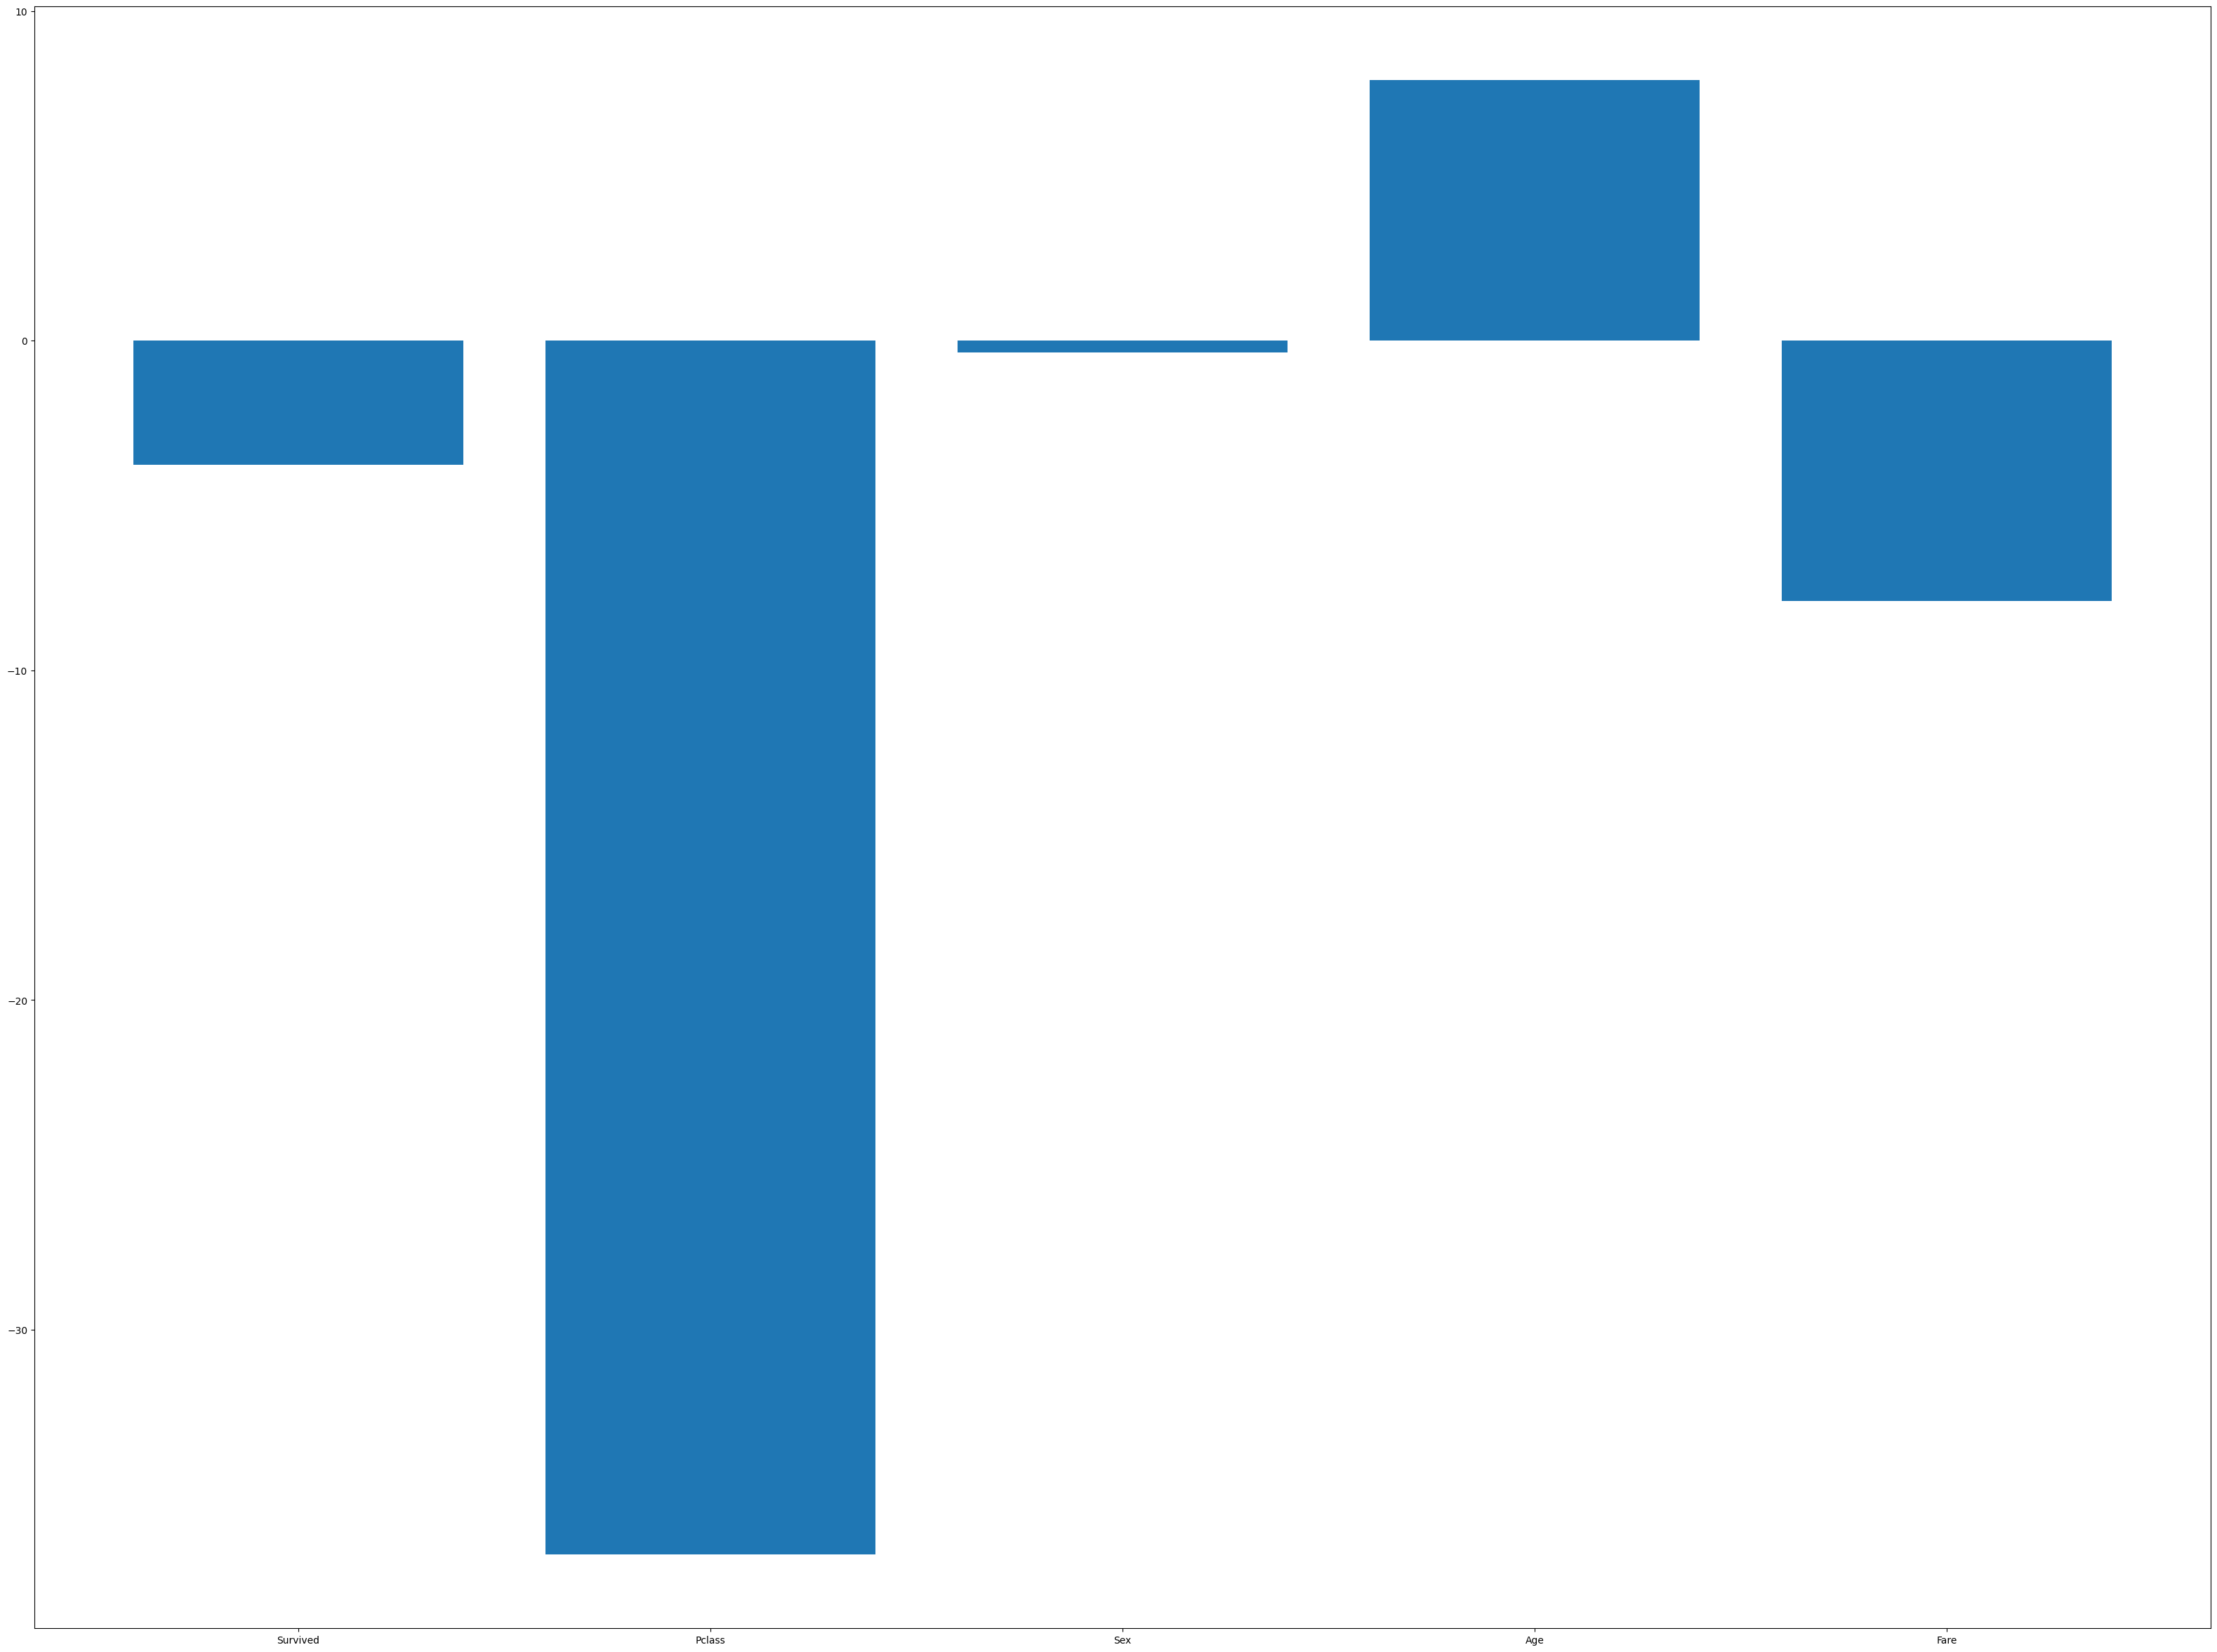

In [57]:
plt.figure(figsize=(40, 30))
plt.bar(data.columns, lin_reg.coef_)

In [58]:
lin_reg = Lasso()
lin_reg.fit(x_train, y_train)
mean_absolute_percentage_error(lin_reg.predict(x_test), y_test)

0.9614702251969328

<BarContainer object of 5 artists>

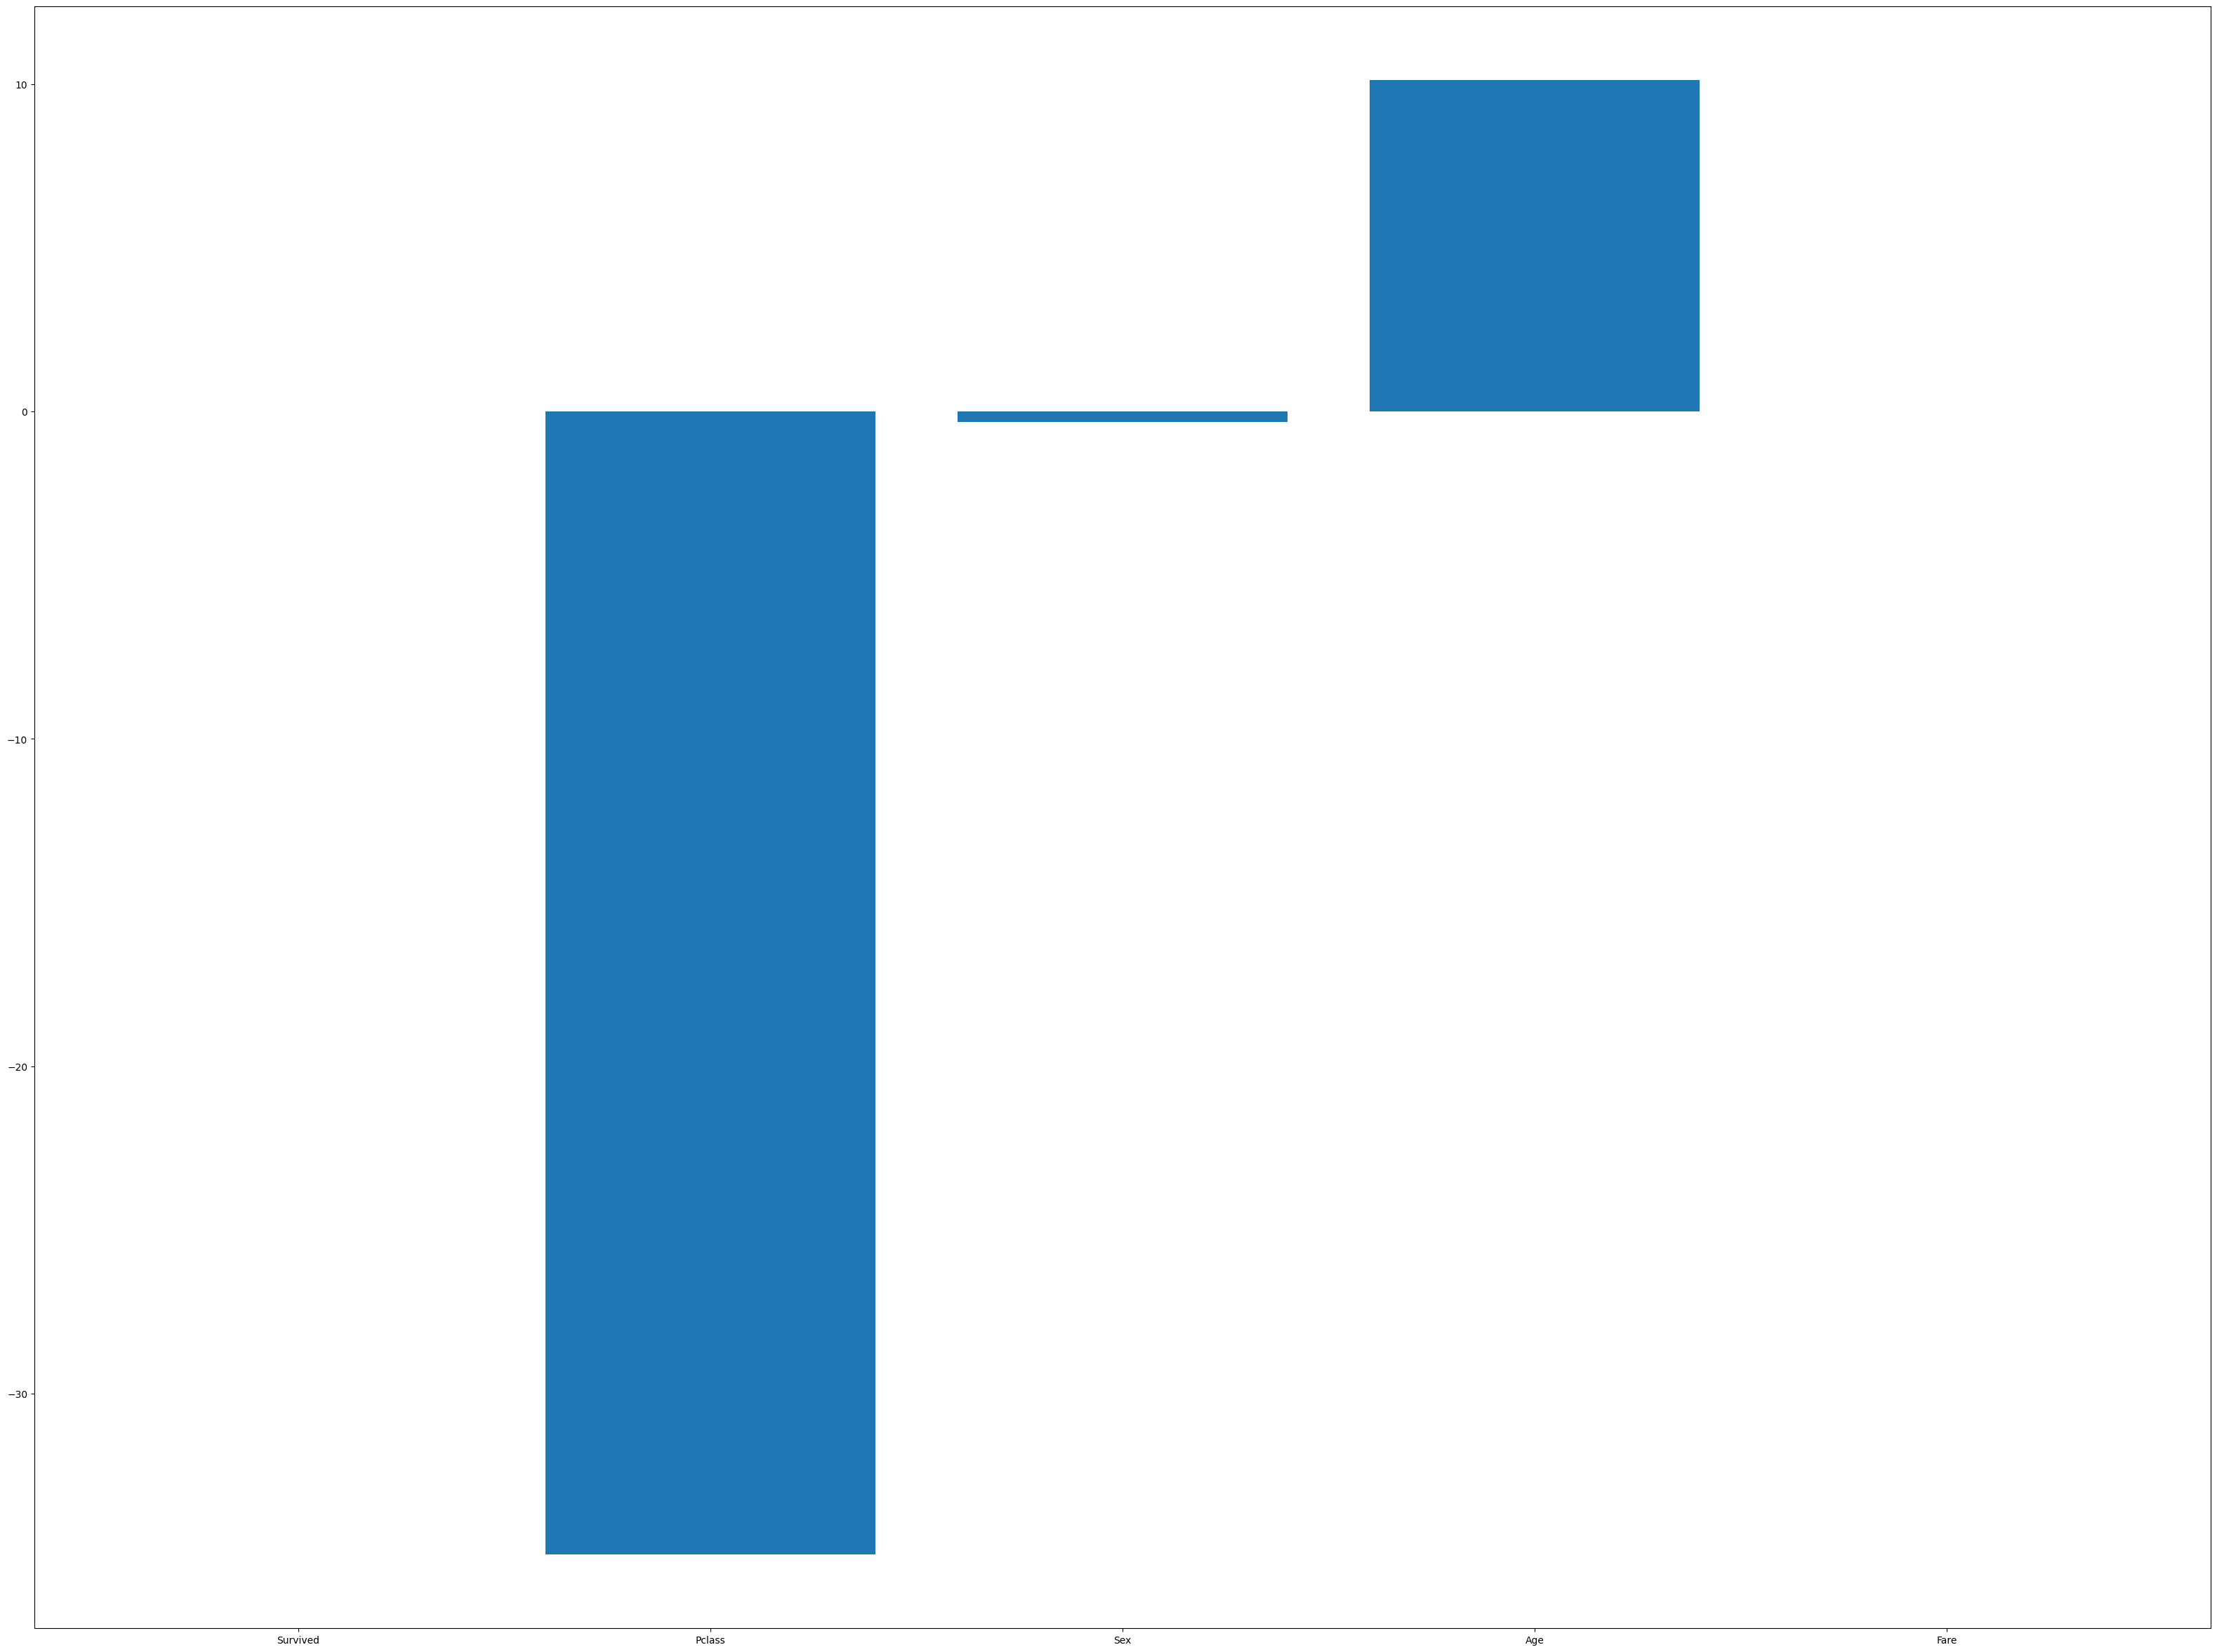

In [59]:
#выведем коэффициенты при признаках
plt.figure(figsize=(40, 30))
plt.bar(data.columns, lin_reg.coef_)